# Lab - Regressao

* Utilizando um datset fornecido, contendo dados sobre suicídios, implemente o que se pede.

* Reponda as questões do Quiz sobre os resultados obtidos neste Lab e envie o formulário.

* Envie/devolva o seu notebook contendo suas implementações.



## Dados do(a) aluno(a)

**Nome**: Italo Miguel Castor Diniz Pinheiro

**Matrícula**: 119111440

## Imports.

In [ ]:
import requests
from io import StringIO

import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import MinMaxScaler

## Carregando o Datset Original

In [ ]:
orig_url='https://drive.google.com/file/d/1bLL16sPoEUOAl0_-ED6kQNoiFm8XQh2A/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw, encoding = "ISO-8859-1")

data.head()

,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Usando sklearn, implemente uma **Regressão Linear Simples** para analisar se o número de suicídios (`'suicides_no'`) pode ser parcialmente explicado com base na população (`'population'`).

Text(0.5, 1.0, 'Suicides x Population')

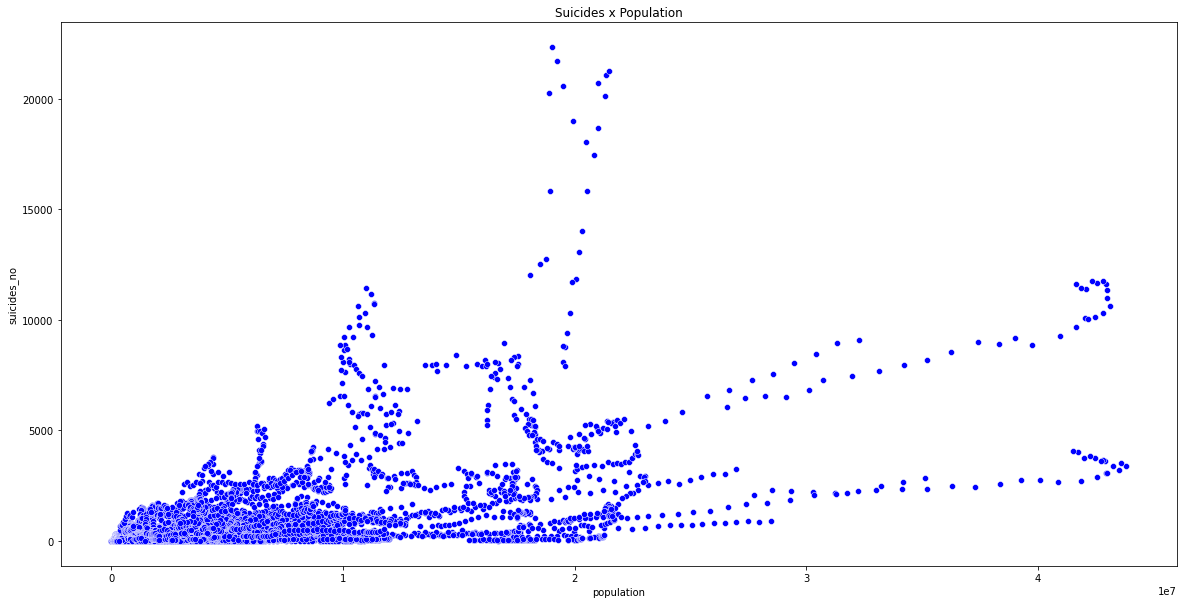

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x='population',y='suicides_no',data=data,color='b')
ax.set_title('Suicides x Population')

In [ ]:
def h(x, b_0, b_1):
  return b_0 + b_1 * x

In [ ]:
X = data_pop = data['population'].values
X_2d = X.reshape(-1,1)
y = data_suicides = data['suicides_no'].values


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

est = LinearRegression()
est.fit(X_2d, y)

y_pred = est.predict(X_2d)

print('MAE:', mean_absolute_error(y, y_pred))
print('MSE:', mean_squared_error(y, y_pred))
print('RMSE: ', mean_squared_error(y,y_pred,squared=False))

simple = r2_score(y,y_pred)
print('r2_score: ', simple)

print("O coeficiente b0 eh:   {}".format(est.intercept_))
print("O coeficiente b1 eh:   {}".format(est.coef_[0]))


MAE: 217.0399022781815
MSE: 504749.8897745603
RMSE:  710.4575214427392
r2_score:  0.3796559399177645
O coeficiente b0 eh:   -19.544371255741993
O coeficiente b1 eh:   0.00014208569223424667


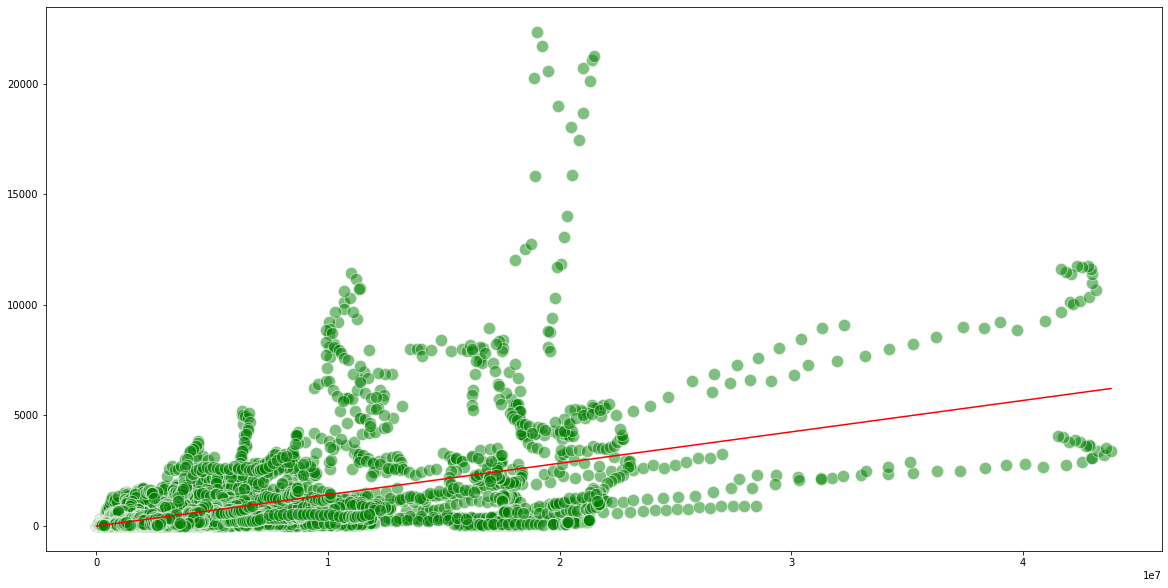

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x=X,y=y,color='g', alpha=.5, marker='o', s=150)
ax = sns.lineplot(x=X,y=y_pred,color='r')

Agora implemente uma **Regressão Linear Múltipla** para analisar se o número de suicídios (`'suicides_no'`) pode ser parcialmente explicado com base na combinação dos valores de população (`'population'`) e renda per capta (`'gdp_per_capita ($)'`).

In [ ]:
X = data[['population','gdp_per_capita ($)']].values
y = data['suicides_no'].values

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
est = LinearRegression()
est.fit(X, y)

y_pred = est.predict(X)

multiple = r2_score(y,y_pred)
print('r2_score: ', r2_score(y,y_pred))


r2_score:  0.37978011816683677


Verifique se houve aumento/diminuição no coeficiente de determinação de um cenário para o outro.

In [ ]:
print( 'Regressão linear simples: {:.4f}\nRegrassão linear multipla: {:.4f}'.format(simple, multiple))

Regressão linear simples: 0.3797
Regrassão linear multipla: 0.3798



No primeiro cenário, podemos dizer que a população explica apenas aproximadamento 38% do número de suicidios de acordo com o coeficiente de determinação. Todavia, quando observamos o segundo caso, no cenário multiplo, podemos dizer que a renda per capita explica praticamente 0% da coluna de suicidio, visto que, a diferença para o primeiro caso foi de aproximadamento 0.0001. Podemos concluir então, que a população tem uma influencia muito maior do que a renda per capita